##DOWNLOAD DATA FROM KAGGLE

In [1]:
!pip install kagglehub

In [2]:
import kagglehub
import os
from google.colab import files

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
data = kagglehub.dataset_download("asdasdasasdas/garbage-classification")

data

'/kaggle/input/garbage-classification'

In [4]:
for root, dirs, files in os.walk(data):
    for name in files:
        print(os.path.join(root, name))

Streaming output truncated to the last 5000 lines.
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal19.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal76.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal346.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal122.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal353.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal98.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal251.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal92.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal268.jpg
/kaggle/input/garbage-classificatio

In [ ]:
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [5]:
base_path = "/kaggle/input/garbage-classification/Garbage classification/Garbage classification"
print(os.listdir(base_path))


['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']


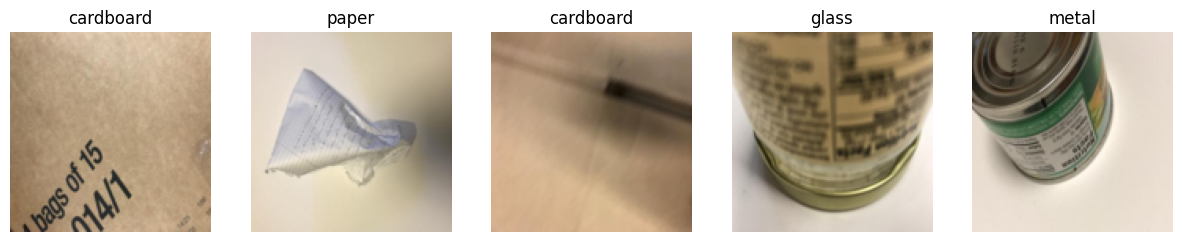

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

data_path = "/kaggle/input/garbage-classification/Garbage classification/Garbage classification"
dataset = datasets.ImageFolder(root=data_path, transform=transform)
loader = DataLoader(dataset, batch_size=5, shuffle=True)

class_names = dataset.classes
images, labels = next(iter(loader))

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()


# VIZUALIZATION OF DATA USING R

###COUNT OF IMAGES PER CLASS

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


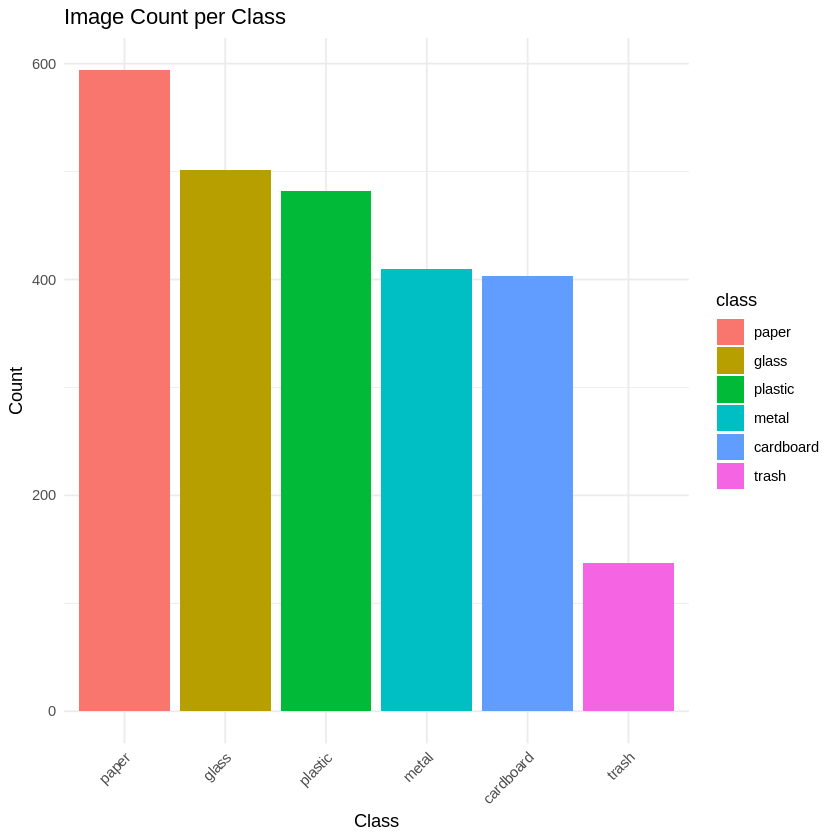

In [1]:
library(tidyverse)

image_dirs <- list.dirs("/kaggle/input/garbage-classification/Garbage classification/Garbage classification", full.names = TRUE, recursive = FALSE)
image_counts <- tibble(class = character(), count = integer())

for (dir in image_dirs) {
  class_name <- basename(dir) # Get the class name from the directory name (basename)
  image_count <- length(list.files(dir, pattern = "\\.jpg$", full.names = TRUE))

  image_counts <- image_counts %>% # Add the class name and image count to the data frame
    add_row(class = class_name, count = image_count)
}

image_counts$class <- factor(image_counts$class, levels = image_counts$class[order(-image_counts$count)])

ggplot(image_counts, aes(x = class, y = count, fill = class)) +
  geom_bar(stat = "identity") +
  labs(title = "Image Count per Class", x = "Class", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


###DISTRIBUTION OF RGB CHANNELS ACROSS CLASSES

In [5]:
install.packages("imager")

library(imager)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’


Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following object is masked from ‘package:stringr’:

    boundary


The following object is masked from ‘package:dplyr’:

    where


The following object is masked from ‘package:tidyr’:

    fill


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




In [3]:
install.packages("ggplot2")

library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(imager)
library(ggplot2)

image_dirs <- list.dirs("/kaggle/input/garbage-classification/Garbage classification/Garbage classification",
                        full.names = TRUE, recursive = FALSE)

avg_rgb_df <- data.frame(Category = character(), R = numeric(), G = numeric(), B = numeric())

for (dir in image_dirs) {
  category <- basename(dir)
  image_files <- list.files(dir, pattern = "\\.jpg$", full.names = TRUE)

  # Sample a few images per class (e.g., 5)
  sample_images <- head(image_files, 5)

  for (file in sample_images) {
    img <- load.image(file)

    # Resize to reduce memory usage
    img <- resize(img, 64, 64)

    # Compute average RGB
    R_mean <- mean(img[,,1])
    G_mean <- mean(img[,,2])
    B_mean <- mean(img[,,3])

    avg_rgb_df <- rbind(avg_rgb_df, data.frame(Category = category, R = R_mean, G = G_mean, B = B_mean))
  }
}


Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following object is masked from ‘package:tidyr’:

    fill


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




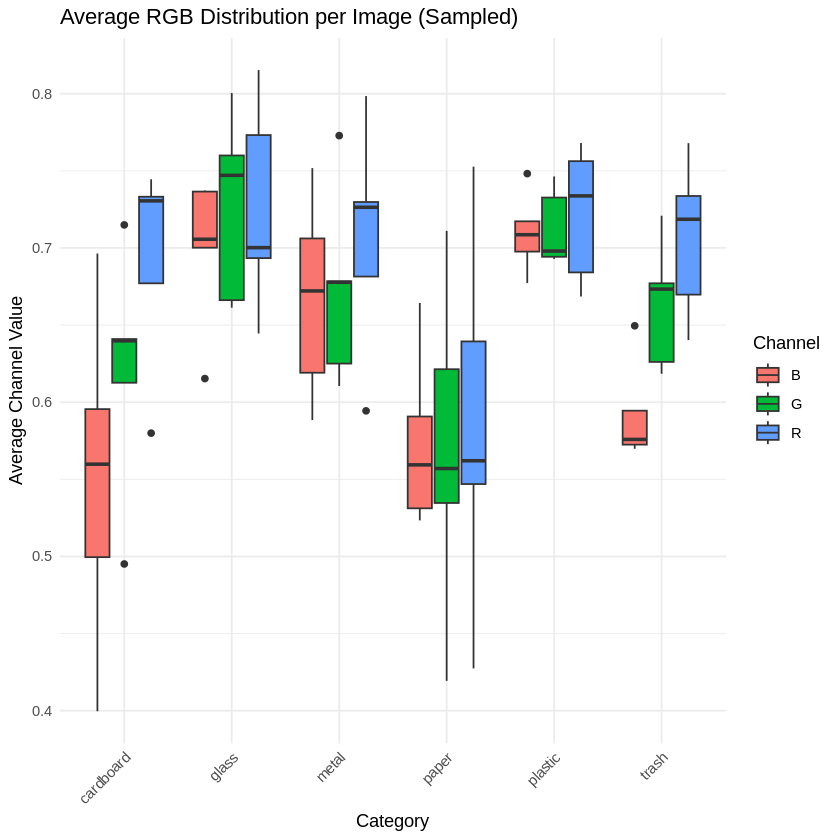

In [3]:
library(tidyr)

avg_rgb_long <- pivot_longer(avg_rgb_df, cols = c(R, G, B), names_to = "Channel", values_to = "Value")

ggplot(avg_rgb_long, aes(x = Category, y = Value, fill = Channel)) +
  geom_boxplot() +
  labs(title = "Average RGB Distribution per Image (Sampled)", y = "Average Channel Value", x = "Category") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


###SCATTER PLOT OF RGB DISTRIBUTION

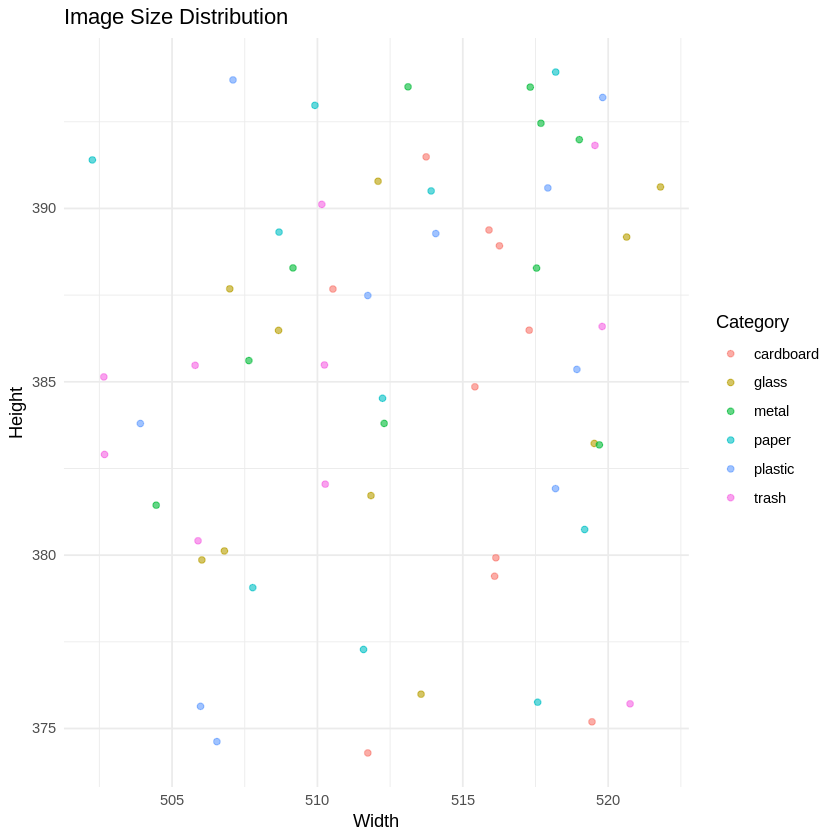

In [6]:
image_dims <- data.frame(Width = numeric(), Height = numeric(), Category = character())

for (dir in image_dirs) {
  category <- basename(dir)
  sample_files <- head(list.files(dir, pattern = "\\.jpg$", full.names = TRUE), 10)

  for (file in sample_files) {
    img <- load.image(file)
    dims <- dim(img)
    image_dims <- rbind(image_dims, data.frame(Width = dims[1], Height = dims[2], Category = category))
  }
}

ggplot(image_dims, aes(x = Width, y = Height, color = Category)) +
  geom_jitter(width = 10, height = 10, alpha = 0.6) +
  labs(title = "Image Size Distribution", x = "Width", y = "Height") +
  theme_minimal()
